# 2. 출생아 수 및 합계출산율

In [1]:
import pandas as pd
df = pd.read_excel('142801_20240323134839018_excel.xlsx', skiprows=2, nrows=2, index_col=0) # index_col=0 -> 0번째 컬럼을 인덱스로 설정
df

C:\Users\its\AppData\Roaming\Python\Python311\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
출생아 수,471.300,484.600,436.500,435.400,438.400,406.200,357.800,326.800,302.700,272.300
합계 출산율,1.244,1.297,1.187,1.205,1.239,1.172,1.052,0.977,0.918,0.837


In [2]:
df.loc['출생아 수']

KeyError: '출생아 수'

In [3]:
df.index

Index(['출생아 수', '합계 출산율'], dtype='object')

In [4]:
df.index.values 
# 원본 데이터는 겉으로는 안보이는 데이터 값이 들어가 있을 수 있음
# df.index.values를 통해 숨어있던 \xa0 라는 유니코드를 찾아내고 값을 변경해야함

array(['출생아\xa0수', '합계\xa0출산율'], dtype=object)

In [5]:
df.rename(index={'출생아\xa0수' : '출생아 수', '합계\xa0출산율' : '합계 출산율'}, inplace=True)
df # rename하는 과정

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
출생아 수,471.300,484.600,436.500,435.400,438.400,406.200,357.800,326.800,302.700,272.300
합계 출산율,1.244,1.297,1.187,1.205,1.239,1.172,1.052,0.977,0.918,0.837


In [6]:
df.index.values

array(['출생아 수', '합계 출산율'], dtype=object)

In [7]:
df.loc['출생아 수']

2011    471.3
2012    484.6
2013    436.5
2014    435.4
2015    438.4
2016    406.2
2017    357.8
2018    326.8
2019    302.7
2020    272.3
Name: 출생아 수, dtype: float64

In [8]:
df.iloc[0]
# 사실 이렇게 iloc를 쓰면 훨씬 간편하지만 굳이 loc를 써야한다면 저런 해결방법이 있음

2011    471.3
2012    484.6
2013    436.5
2014    435.4
2015    438.4
2016    406.2
2017    357.8
2018    326.8
2019    302.7
2020    272.3
Name: 출생아 수, dtype: float64

In [9]:
df.T # row와 column을 통째로 바꾸는 기능

,출생아 수,합계 출산율
2011,471.3,1.244
2012,484.6,1.297
2013,436.5,1.187
2014,435.4,1.205
2015,438.4,1.239
2016,406.2,1.172
2017,357.8,1.052
2018,326.8,0.977
2019,302.7,0.918
2020,272.3,0.837


In [10]:
df = df.T
df

,출생아 수,합계 출산율
2011,471.3,1.244
2012,484.6,1.297
2013,436.5,1.187
2014,435.4,1.205
2015,438.4,1.239
2016,406.2,1.172
2017,357.8,1.052
2018,326.8,0.977
2019,302.7,0.918
2020,272.3,0.837


In [11]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic' 
matplotlib.rcParams['font.size'] = 15 
matplotlib.rcParams['axes.unicode_minus'] = False

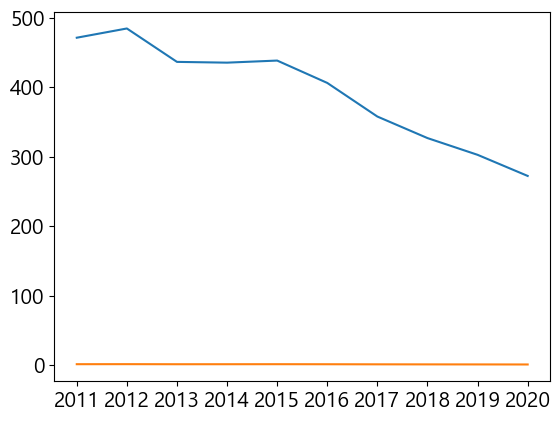

In [12]:
plt.plot(df.index, df['출생아 수'])
plt.plot(df.index, df['합계 출산율'])

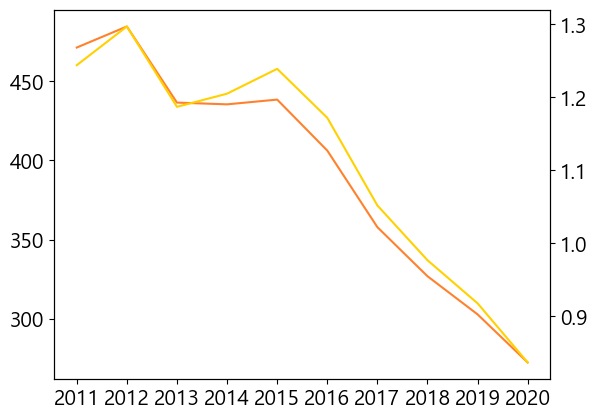

In [16]:
fig, ax1 = plt.subplots() # subplots()에 2,2 이렇게 안넣고 빈칸으로 두면 그래프 하나만 그림
ax1.plot(df.index, df['출생아 수'], color='#ff812d')

ax2 = ax1.twinx() # twinx() -> x축을 공유하는 쌍둥이 axis를 생성
ax2.plot(df.index, df['합계 출산율'], color='#ffd100')

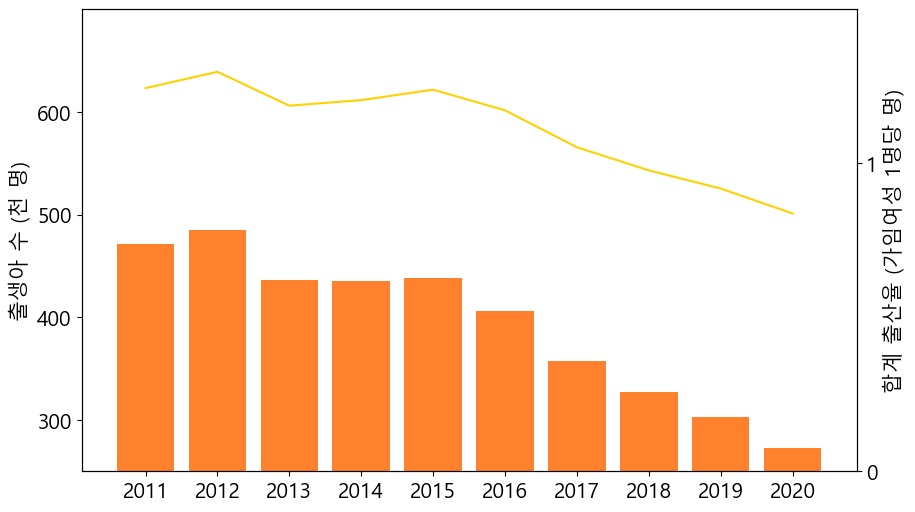

In [23]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.set_ylabel('출생아 수 (천 명)')
ax1.set_ylim(250, 700)
ax1.set_yticks([300, 400, 500, 600])
ax1.bar(df.index, df['출생아 수'], color='#ff812d')

ax2 = ax1.twinx()
ax2.set_ylabel('합계 출산율 (가임여성 1명당 명)')
ax2.set_ylim(0, 1.5)
ax2.set_yticks([0, 1])
ax2.plot(df.index, df['합계 출산율'], color='#ffd100')

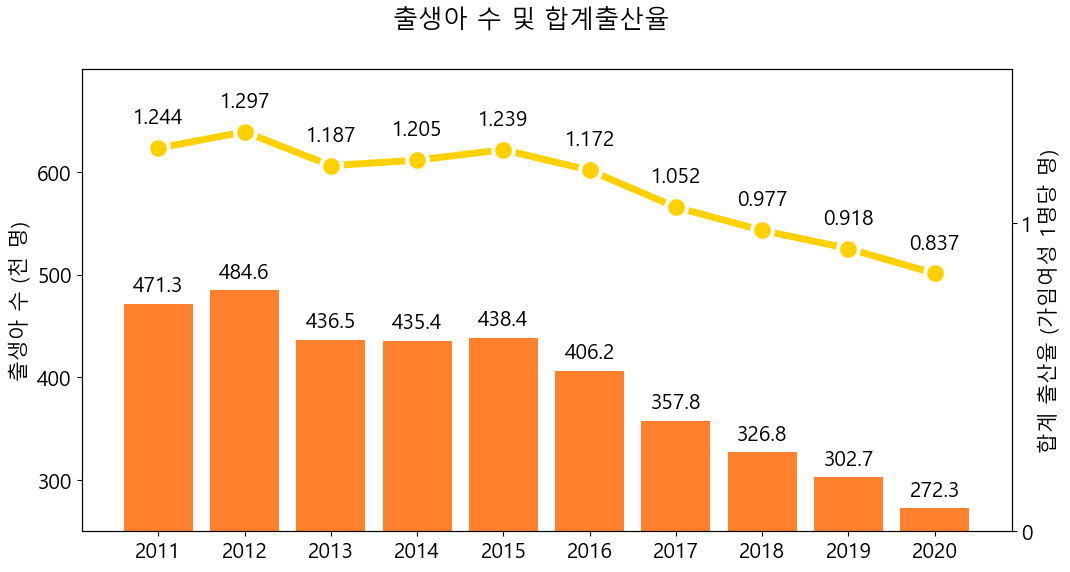

In [35]:
fig, ax1 = plt.subplots(figsize=(12, 6))
fig.suptitle('출생아 수 및 합계출산율')
ax1.set_ylabel('출생아 수 (천 명)')
ax1.set_ylim(250, 700)
ax1.set_yticks([300, 400, 500, 600])
ax1.bar(df.index, df['출생아 수'], color='#ff812d')
for idx, val in enumerate(df['출생아 수']): # 각각의 막대 그래프의 값 출력
    ax1.text(idx, val+12, val, ha='center')

ax2 = ax1.twinx()
ax2.set_ylabel('합계 출산율 (가임여성 1명당 명)')
ax2.set_ylim(0, 1.5)
ax2.set_yticks([0, 1])
ax2.plot(df.index, df['합계 출산율'], color='#ffd100', marker='o', ms=15, lw=5, mec='w', mew=3)
for idx, val in enumerate(df['합계 출산율']):
    ax2.text(idx, val+0.08, val, ha='center')